<a href="https://colab.research.google.com/github/greeshmadh/Stock-market-prediction/blob/main/MLDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of data (823, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                823 non-null    object 
 1   Prev Close          823 non-null    float64
 2   Open                823 non-null    float64
 3   High                823 non-null    float64
 4   Low                 823 non-null    float64
 5   Last                823 non-null    float64
 6   Close               823 non-null    float64
 7   VWAP                823 non-null    float64
 8   Volume              823 non-null    int64  
 9   Turnover            823 non-null    float64
 10  Trades              823 non-null    int64  
 11  Deliverable Volume  823 non-null    int64  
 12  %Deliverble         823 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
D

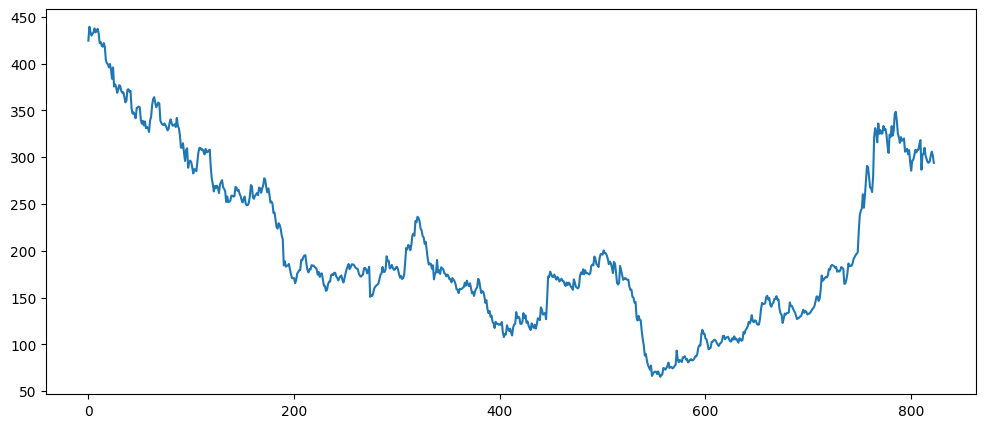

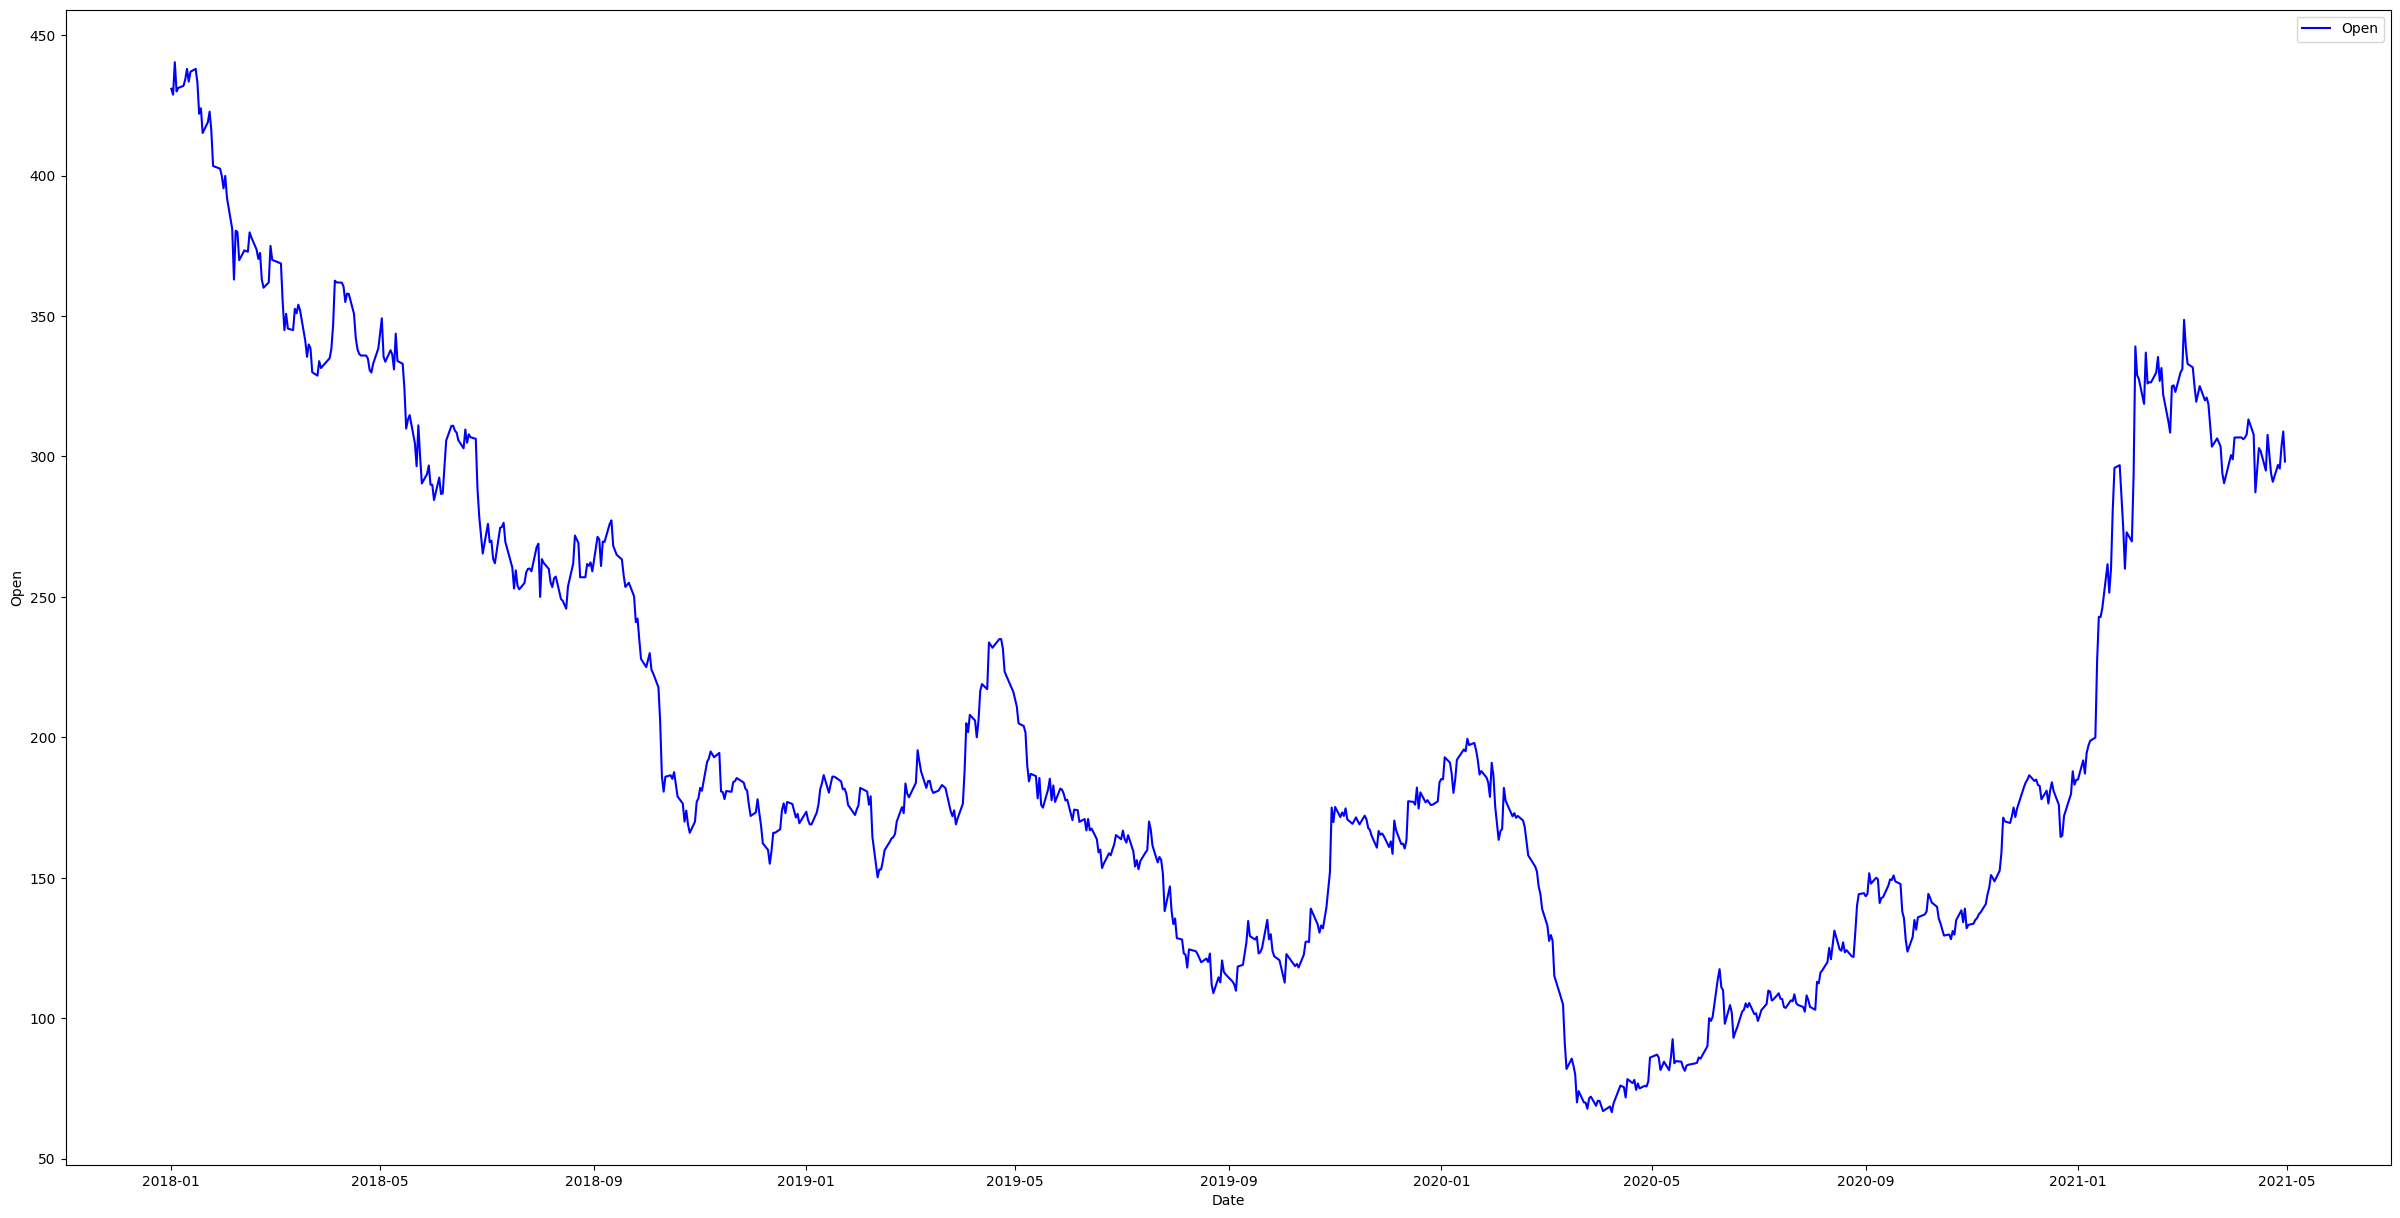

<Axes: >

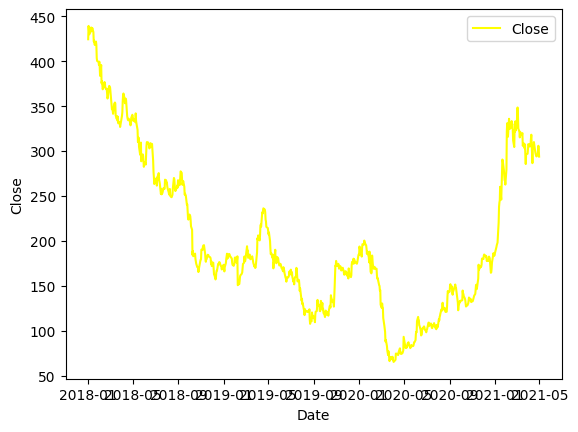

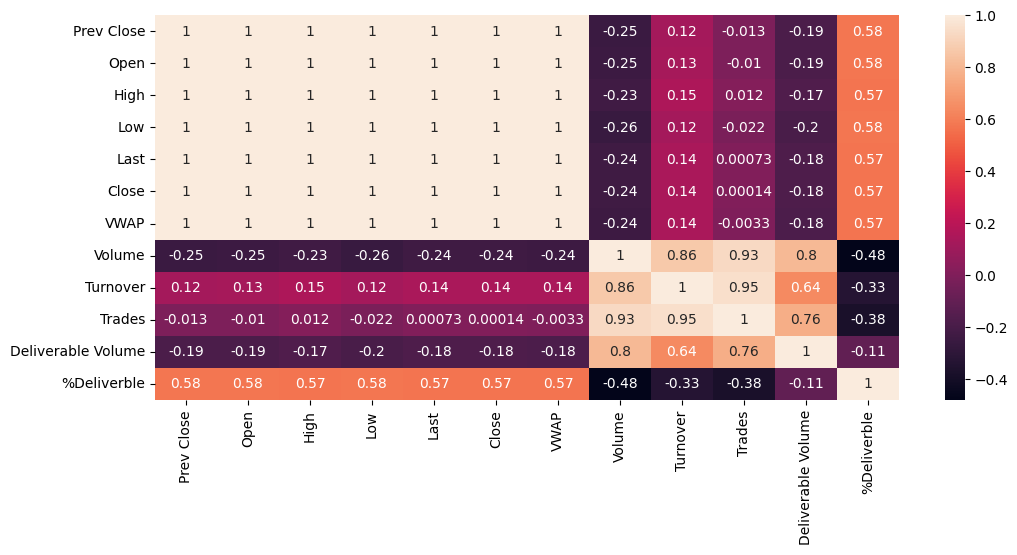

In [98]:
#pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('TATAMOTORS1.csv',parse_dates=True)
print('Shape of data',df.shape)
df.head(5)
df.tail(5)
df=df.dropna()
df.describe()
df.info()
df.isnull().sum()
#df["Date"]=pd.to_datetime(df["Date"])
import datetime
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")
df.info()
df.columns.values
df.duplicated().sum()
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")
df.info()
df['Close'].plot(figsize=(12,5))
plt.figure(figsize=(30,15))
x=df['Date']
y=df['Open']
z=df['Close']
sns.lineplot(x=x,y=y,color='blue',label='Open')
plt.legend()
plt.show()
sns.lineplot(x=x,y=z,color='yellow',label='Close')
plt.figure(figsize=[12,5])
d=df
corr=d.corr()
sns.heatmap(corr,annot=True)




In [78]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)
adf_test(df['Close'])

1. ADF :  -2.5883838934968075
2. P-Value :  0.09542192576358427
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 821
5. Critical Values :
	 1% :  -3.438340089700066
	 5% :  -2.8650668167215243
	 10% :  -2.568647979826153


In [79]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df['Close'],
                          suppress_warnings=True)

stepwise_fit.summary()
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)
from statsmodels.tsa.arima_model import ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5847.326, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=5636.144, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=5556.405, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=5512.225, Time=0.16 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=5477.405, Time=0.21 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=5437.512, Time=0.30 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.90 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=1.60 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=5439.506, Time=1.81 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 6.187 seconds


In [80]:
print(df.shape)
train=df.iloc[:31]
test=df.iloc[31:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(823, 13)
(31, 13) (792, 13)
Date                  2018-02-15 00:00:00
Prev Close                         376.85
Open                                379.8
High                                382.2
Low                                 373.1
Last                                375.9
Close                               375.8
VWAP                               379.06
Volume                           10225880
Turnover                388000000000000.0
Trades                              90362
Deliverable Volume                4999054
%Deliverble                        0.4889
Name: 31, dtype: object Date                  2021-04-30 00:00:00
Prev Close                          301.9
Open                                298.2
High                                301.3
Low                                292.55
Last                                293.1
Close                              293.85
VWAP                               297.01
Volume                           36121668
Turnover               

In [81]:
import statsmodels.api as sm
mod = sm.tsa.arima.ARIMA(df.Close,order=(5,2,0))
model = mod.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  823
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -2712.756
Date:                Thu, 13 Jul 2023   AIC                           5437.512
Time:                        17:59:17   BIC                           5465.775
Sample:                             0   HQIC                          5448.356
                                - 823                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7966      0.024    -32.971      0.000      -0.844      -0.749
ar.L2         -0.6381      0.035    -18.052      0.000      -0.707      -0.569
ar.L3         -0.5060      0.036    -14.191      0.0

<Axes: >

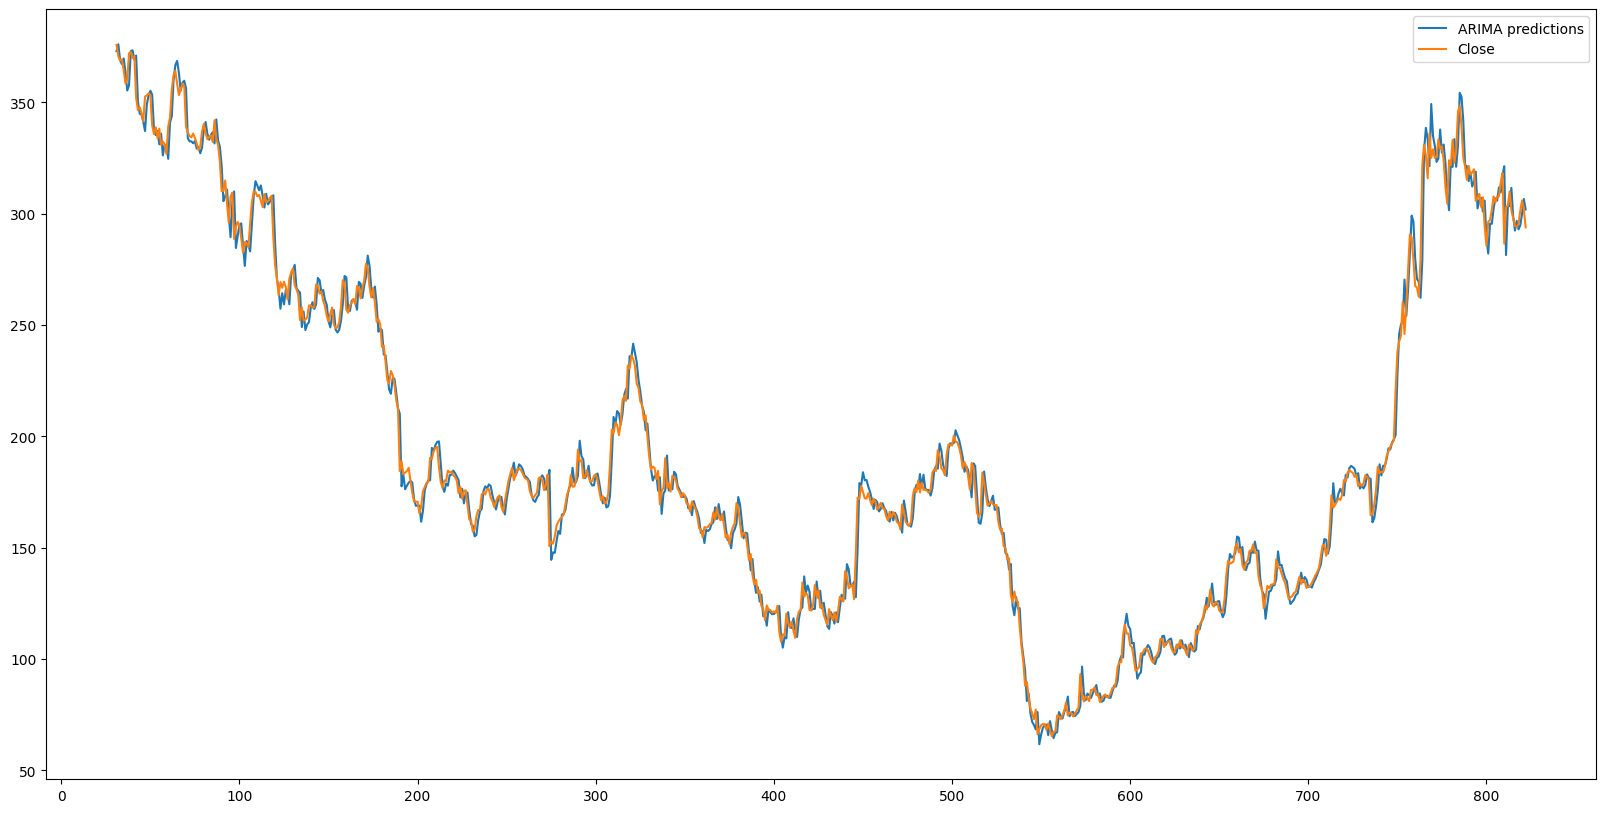

In [82]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
fig=plt.figure(figsize=[20,10])
pred.plot(legend=True)
test['Close'].plot(legend=True)

<Axes: >

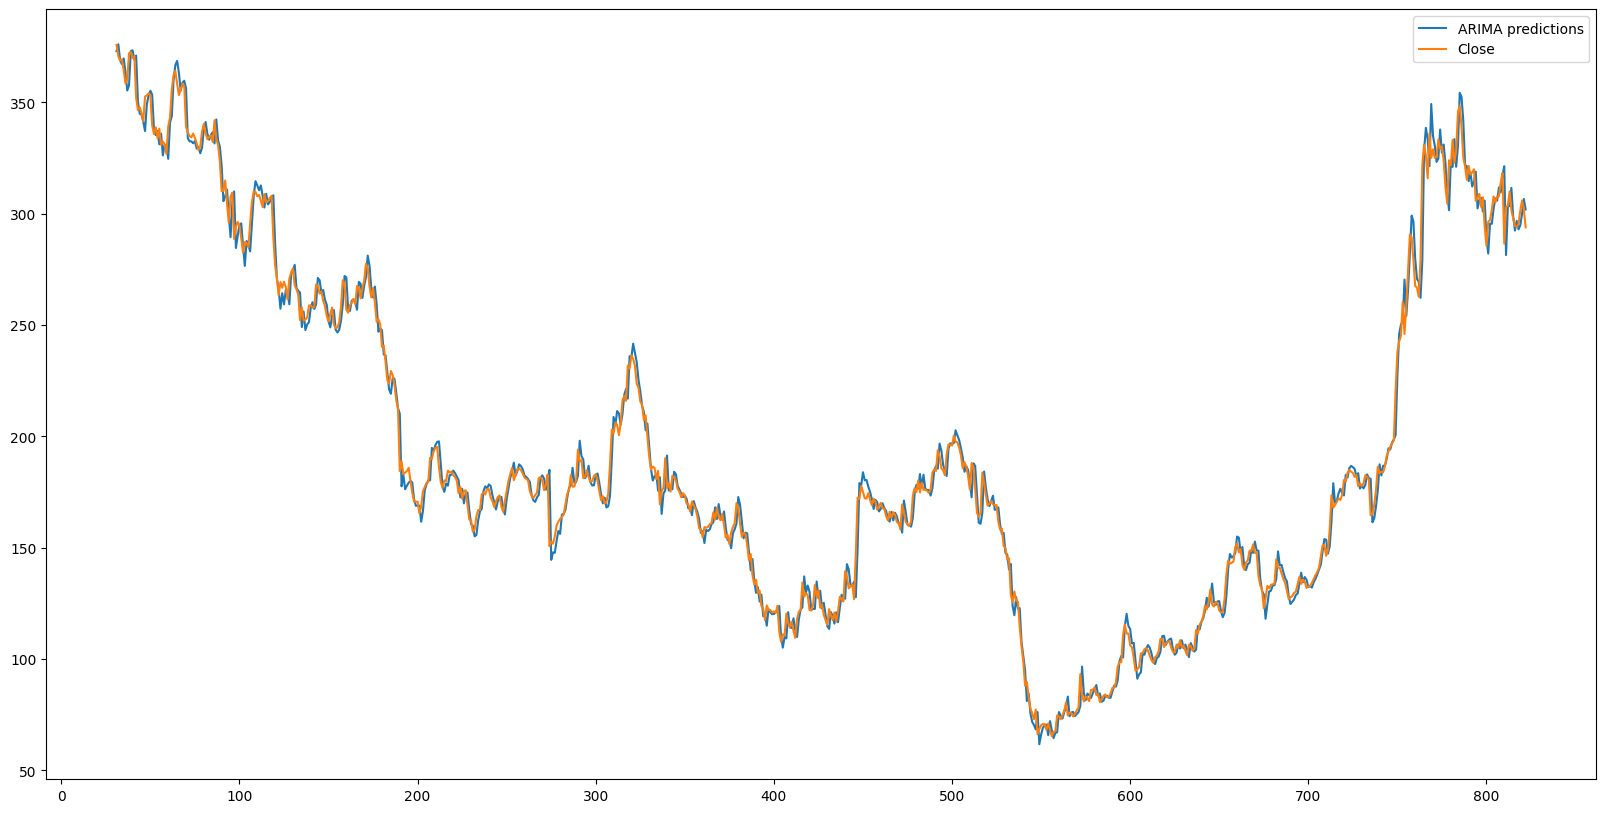

In [83]:
fig=plt.figure(figsize=[20,10])
pred.plot(legend='ARIMA Predictions')
test['Close'].plot(legend=True)

In [84]:
test['Close'].mean()

194.1662878787879

In [85]:
from sklearn import metrics
import math
error_score=metrics.r2_score(pred,test["Close"])
print("R2 Score :",error_score)
mse=metrics.mean_squared_error(pred,test["Close"])
print("Mean Square Error:",mse)
rmse=math.sqrt(mse)
print("Root Mean Square Error:",rmse)

R2 Score : 0.9929469889082508
Mean Square Error: 42.93216920986403
Root Mean Square Error: 6.552264433756014


In [86]:
index_future_dates=pd.date_range(start='2021-04-30',end='2021-05-30')
#print(index_future_dates)
pred=model.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-04-30    293.031510
2021-05-01    292.878550
2021-05-02    293.189799
2021-05-03    292.459549
2021-05-04    290.095590
2021-05-05    287.592767
2021-05-06    286.445431
2021-05-07    285.423825
2021-05-08    284.358725
2021-05-09    282.980256
2021-05-10    281.333665
2021-05-11    279.771747
2021-05-12    278.460355
2021-05-13    277.159354
2021-05-14    275.818961
2021-05-15    274.404500
2021-05-16    272.955167
2021-05-17    271.540818
2021-05-18    270.170912
2021-05-19    268.797769
2021-05-20    267.410915
2021-05-21    266.009123
2021-05-22    264.604971
2021-05-23    263.210450
2021-05-24    261.823234
2021-05-25    260.433969
2021-05-26    259.041037
2021-05-27    257.645521
2021-05-28    256.250520
2021-05-29    254.857754
2021-05-30    253.466033
Freq: D, Name: ARIMA Predictions, dtype: float64


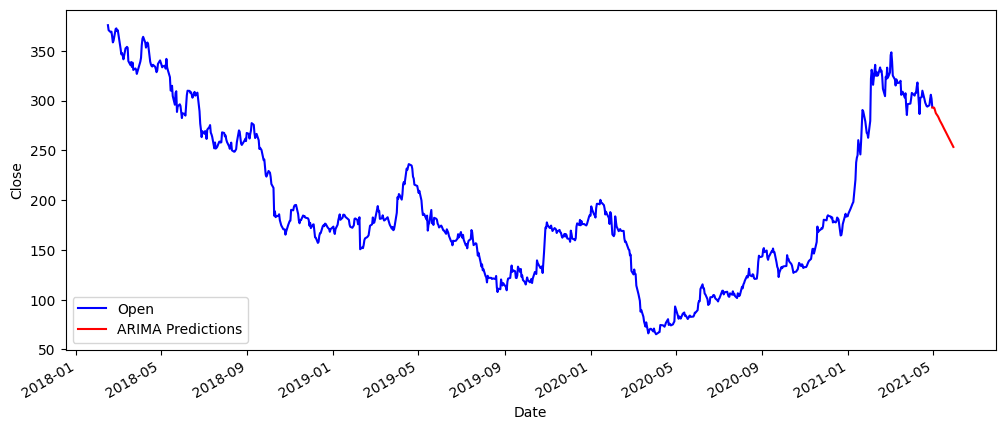

In [95]:
plt.figure(figsize=(30,15))
x=df['Date']
y=test['Close']
z=pred
sns.lineplot(x=x,y=y,color='blue',label='Open')


plt.legend()

pred.plot(figsize=(12,5),legend=True,color='red')
plt.show()